In [1]:
import pandas as pd
import networkx as nx
import scipy.io
import matplotlib.pyplot as plt
import collections
import numpy as np
from collections import Counter
import itertools
from numpy.linalg import matrix_power
import random
import sys

# create Graph

In [2]:
G_np = nx.generators.random_graphs.gnp_random_graph(6596, 0.02,directed=False)

In [3]:
print(nx.info(G_np))

Graph with 6596 nodes and 434769 edges


# part1: degree distrubution plot

In [ ]:
def plot_log_degree_distribution(G):
  degs = {}
  for n in G.nodes():
    deg = G.degree(n) 
    if deg not in degs:
      degs[deg] = 0 
    degs[deg] += 1
  items = sorted(degs.items())

  fig = plt.figure(figsize=(8,6))
  ax = fig.add_subplot(111)
  ax.plot([key for (key,value) in items], [value for (key,value) in items],c='darkcyan') 
  ax.set_xscale('log') 
  ax.set_yscale('log')
  ax.set_xlabel("log Degree")
  ax.set_ylabel("log Frequency of Nodes")
  plt.title("Degree Distribution Log Plot")
  plt.show()
  fig.savefig("degree_distribution_log.png")

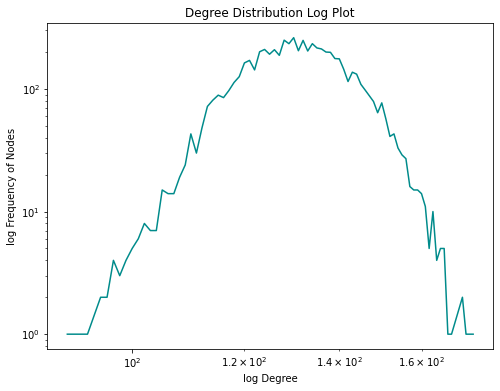

In [ ]:
plot_log_degree_distribution(G_np)

In [ ]:
def plot_degree_distribution(G):
  degs = {}
  for n in G.nodes():
    deg = G.degree(n) 
    if deg not in degs:
      degs[deg] = 0 
    degs[deg] += 1
  items = sorted(degs.items())

  fig = plt.figure(figsize=(8,6))
  ax = fig.add_subplot(111)
  ax.plot([key for (key,value) in items], [value for (key,value) in items],c='orangered') 
  ax.set_xlabel("Degree")
  ax.set_ylabel("Frequency of Nodes")
  plt.title("Degree Distribution Plot")
  plt.show()
  fig.savefig("degree_distribution.png")

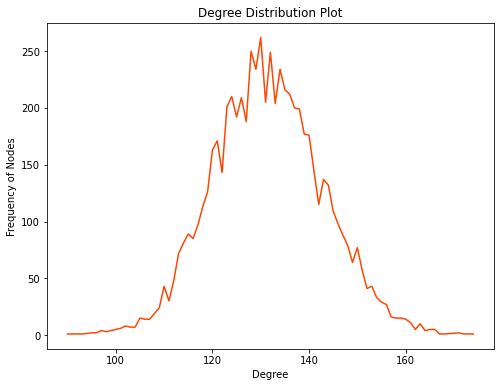

In [ ]:
plot_degree_distribution(G_np)

# part2: 7 length paths

In [ ]:
from numpy.linalg import matrix_power

adjacency_matrix = nx.to_numpy_matrix(G_np, weight=None)
adj_7 = matrix_power(adjacency_matrix, 7)
np.sum(adj_7)/2

2.3494268585078287e+18

# part3: diameter

In [ ]:
nx.diameter(G_np)

3

In [ ]:
import sys
sys.setrecursionlimit(50000)
print(sys.getrecursionlimit())

50000


In [ ]:
def DFS(graph, src, prev_len, max_len, visited): 
  visited[src] = 1 
  curr_len = 0
  adjacent = None
  G_adj = graph.adj
  for adjacent in list(G_adj[src].keys()): 
    if not visited[adjacent]: 
        curr_len = prev_len + 1
        DFS(graph, adjacent, curr_len, max_len, visited) 
    if (max_len[0] < curr_len):  
        max_len[0] = curr_len  
    curr_len = 0

In [ ]:
max_len = [-999999999999]
G0 = G_np
for node in G0.nodes():
  if node%250 == 0:
    print(node)
  visited = [False] * G_np.number_of_nodes()
  DFS(G0, node, 0, max_len, visited)

print()
print(max_len[0])

0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750
5000
5250
5500
5750
6000
6250
6500

6548


# part4: clustering coefficient

In [4]:
number_of_triangles = sum(nx.triangles(G_np).values()) / 3
number_of_triangles

382256.0

In [6]:
from numpy.linalg import matrix_power

adjacency_matrix = nx.to_numpy_matrix(G_np, weight=None)
adj_3 = matrix_power(adjacency_matrix, 3)

In [7]:
print("number of triangles: ",np.trace(adj_3)/6)

number of triangles:  382256.0


In [11]:
from itertools import combinations

def get_open_triangles(G, node):

    open_triangle_nodes = []
    neighbors = set(G.neighbors(node))
    
    for n1, n2 in combinations(neighbors, 2):
        if not G.has_edge(n1, n2):
            open_triangle_nodes.append([n1, node, n2])
    
    return open_triangle_nodes

In [12]:
s = 0
for i in range(G_np.number_of_nodes() ):
  s += len(get_open_triangles(G_np,i))
w = s

In [13]:
print("global clustering coefficient is : ",6*number_of_triangles/w)

global clustering coefficient is :  0.04083785971807309


# part5: connected components

In [ ]:
ccs= nx.number_connected_components(G_np)

In [ ]:
print("number of connected components is : ",((ccs)))

number of connected components is :  1
